<a href="https://colab.research.google.com/github/dharmick/machine-learning/blob/master/Logistic_Regression_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression using Gradient Descent

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
class LogisticRegression:
  def __init__(self, lr = 0.01, epoch = 10000):
    self.lr = lr
    self.epoch = epoch
  
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  
  def fit(self, x, y):
    graph_x = []
    graph_y = []
    self.w = np.zeros(x.shape[1])
    for i in range(self.epoch):
      z = np.dot(x, self.w.T)
      a = self.sigmoid(z)
      dz = a - y.T
      dw = np.dot(x.T, dz) / y.size
      self.w -= self.lr * dw.T
      J = np.sum(dw)
      graph_x.append(i)
      graph_y.append(J)
      if i%1000==0 or i==self.epoch-1:
        print(f"\nIteration {i}")
        print("cost is ", J)
    a = np.around(a)
    confusionMatrix = self.confusionMatrix(a, y_train)
    accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / np.sum(confusionMatrix)
    print("\nConfusion Matrix\n", confusionMatrix)
    print("\ntraining accuracy", accuracy)
    self.showCost(graph_x, graph_y)
    
  
      
  def predict(self, x):
    pred =  self.sigmoid(np.dot(x, self.w.T))
    return pred
  
  def showCost(self, x, y):
    plt.plot(x, y)
    plt.xlabel("Epochs (Iterations)")
    plt.ylabel("Cost")
    plt.title("Cost v/s Epochs")
    plt.show()
    
  def confusionMatrix(self, y_hat, y):
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    for i, item in enumerate(y):
      if y_hat[i]==1.0 and y[i]==1:
        tp += 1
      elif y_hat[i]==0.0 and y[i]==0:
        tn += 1
      elif y_hat[i]==0.0 and y[i]==1:
        fn += 1
      else:
        fp += 1
    return np.array([[tn, fp], [fn, tp]])

  

In [38]:
# Importing the dataset to predict if the person has a heart disease.
dataset = pd.read_csv('heart.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
dataset.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [0]:
# Splitting training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 0)


Iteration 0
cost is  0.5272660499349897

Iteration 1000
cost is  0.05288933054828352

Iteration 2000
cost is  0.019056961447469718

Iteration 3000
cost is  0.00826865274669355

Iteration 4000
cost is  0.003937096016508668

Iteration 4999
cost is  0.0019750899218656764

Confusion Matrix
 [[101  28]
 [ 16 142]]

training accuracy 0.8466898954703833


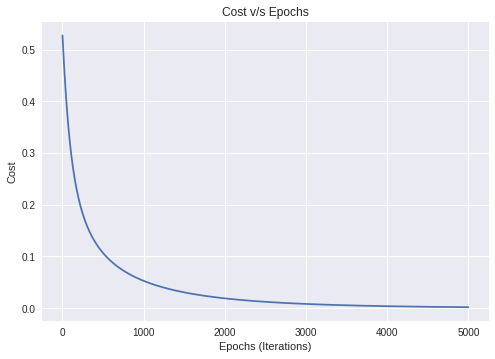

In [41]:
# Training
classifier = LogisticRegression(lr = 0.01, epoch = 5000)
classifier.fit(x_train, y_train)

In [42]:
#Testing
y_pred = classifier.predict(x_test)
print("\nExpected result", y_test)
print("\npredicted result ", y_pred)
y_pred = np.around(y_pred)
confusionMatrix = classifier.confusionMatrix(y_pred, y_test)
accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / np.sum(confusionMatrix)
print("\nConfusion Matrix\n", confusionMatrix)
print("\ntest accuracy ", accuracy)


Expected result [0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1]

predicted result  [0.014890 0.686364 0.718680 0.011345 0.079865 0.346974 0.047425 0.069764
 0.001728 0.003851 0.806569 0.950390 0.018810 0.876849 0.965522 0.705332]

Confusion Matrix
 [[8 1]
 [1 6]]

test accuracy  0.875
